<a href="https://colab.research.google.com/github/arbeeorlar/data_science/blob/main/kaggle_competition_introvert_and_extrovert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competition(Determine Extrovet and Introvert)

### **Your objective is to predict whether a person is an Introvert or Extrovert, given their social behavior and personality traits.**

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
import math
from google.colab import files

In [120]:
df_train = pd.read_csv("/content/sample_data/train.csv")
df_test = pd.read_csv("/content/sample_data/test.csv")
df_submission = pd.read_csv("/content/sample_data/sample_submission.csv")

In [121]:
df_test_copy = df_test.copy()
df_train_copy = df_train.copy()
df_submission_copy = df_submission.copy()

In [122]:
df_train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [123]:
df_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [124]:
df_train.shape

(18524, 9)

In [125]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [126]:
df_train.duplicated().sum()

np.int64(0)

In [127]:
df_train.drop_duplicates(inplace=True)

In [128]:
df_train.isna().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [129]:
df_test.isna().sum()

,0
id,0
Time_spent_Alone,425
Stage_fear,598
Social_event_attendance,397
Going_outside,466
Drained_after_socializing,432
Friends_circle_size,350
Post_frequency,408


In [130]:
# Handle missing values (simple strategy)
df_train.fillna(method='ffill', inplace=True)

In [131]:
df_train.isna().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [132]:
df_test.fillna(method='ffill', inplace=True)

In [133]:
df_test.isna().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,1


In [134]:
df_test['Post_frequency'] = df_test['Post_frequency'].fillna(df_test['Post_frequency'].mean())

In [135]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18524.0,9261.500000,5347.562529,0.0,4630.75,9261.5,13892.25,18523.0
Time_spent_Alone,18524.0,3.147538,3.012363,0.0,1.00,2.0,4.00,11.0
Social_event_attendance,18524.0,5.258799,2.754327,0.0,3.00,5.0,8.00,10.0
Going_outside,18524.0,4.051663,2.062846,0.0,3.00,4.0,6.00,7.0
Friends_circle_size,18524.0,7.985316,4.214720,0.0,5.00,8.0,12.00,15.0
Post_frequency,18524.0,4.984291,2.883459,0.0,3.00,5.0,7.00,10.0


# **Exploratory Data Analysis**

**Univariate Analysis**

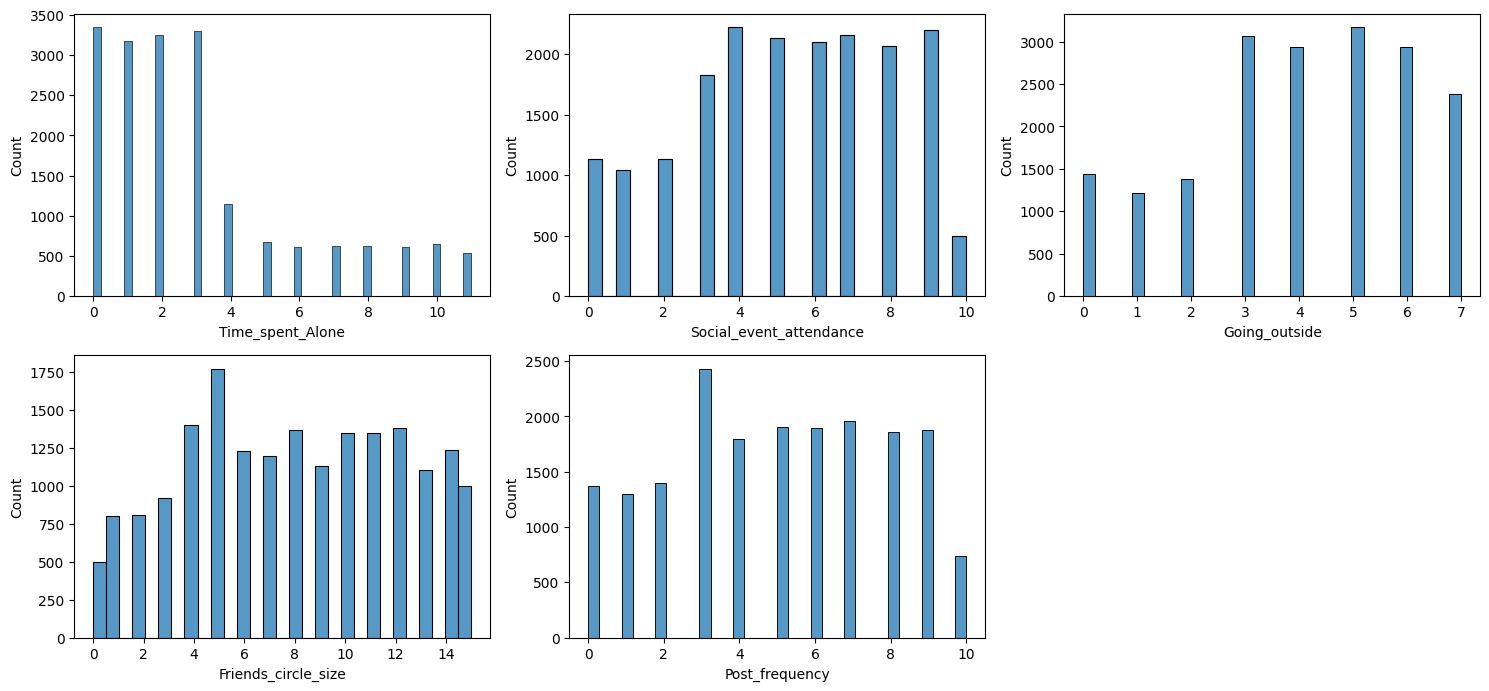

In [136]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = df_train.select_dtypes(include=['number']).columns.tolist()
features.remove('id')
# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.histplot(data=df_train, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

# **Insight**

| Feature                   | Shape/Skew           | Key Insight                         |
| ------------------------- | -------------------- | ----------------------------------- |
| **Time_spent_Alone**        | Right-skewed         | Majority spend little time alone    |
| **Social_event_attendance** | Flat/Uniform         | Most attend social events regularly |
| **Going_outside**          | Bell-shaped          | Regular outdoor activity is common  |
| **Friends_circle_size**     | Slightly left-skewed | Most have a moderate-size circle    |
| **Post_frequency**          | Moderate & uniform   | Social media use is well
spread     |




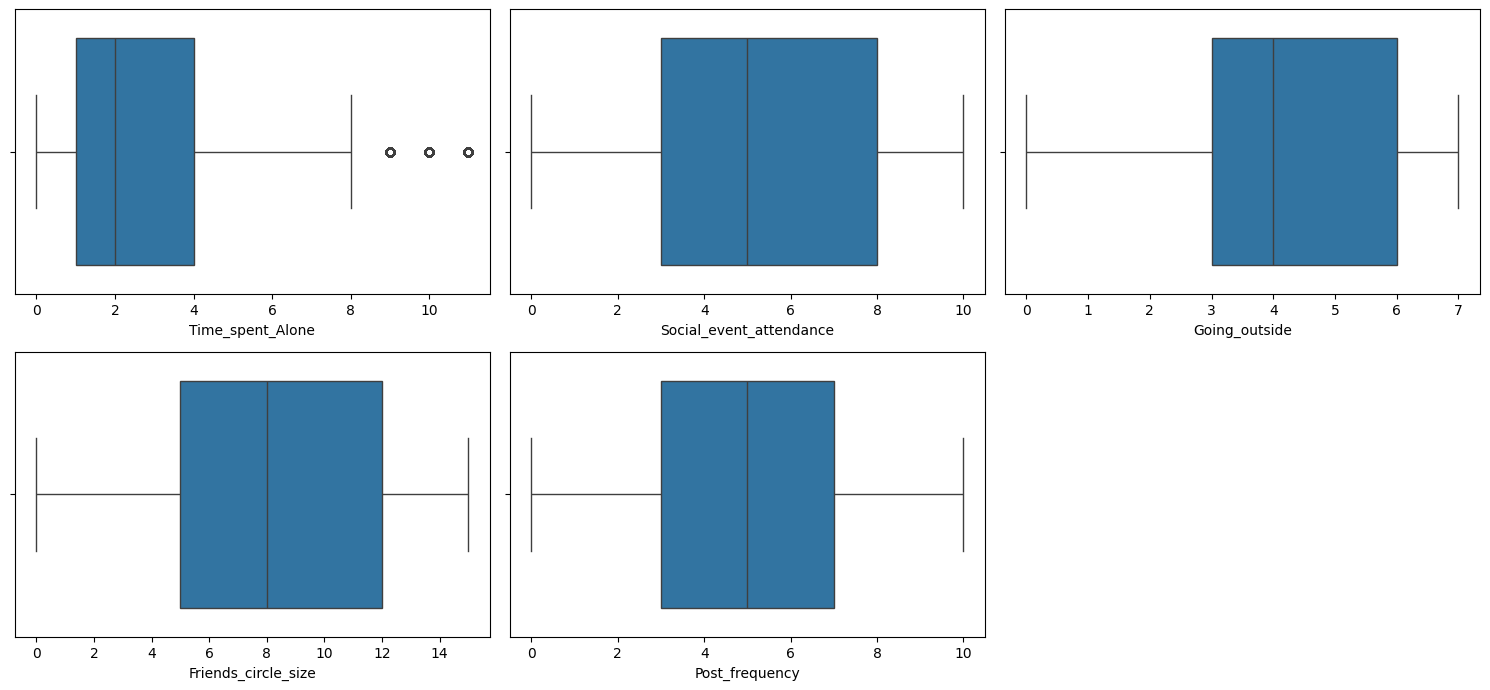

In [137]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = df_train.select_dtypes(include=['number']).columns.tolist()
features.remove('id')
# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=df_train, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

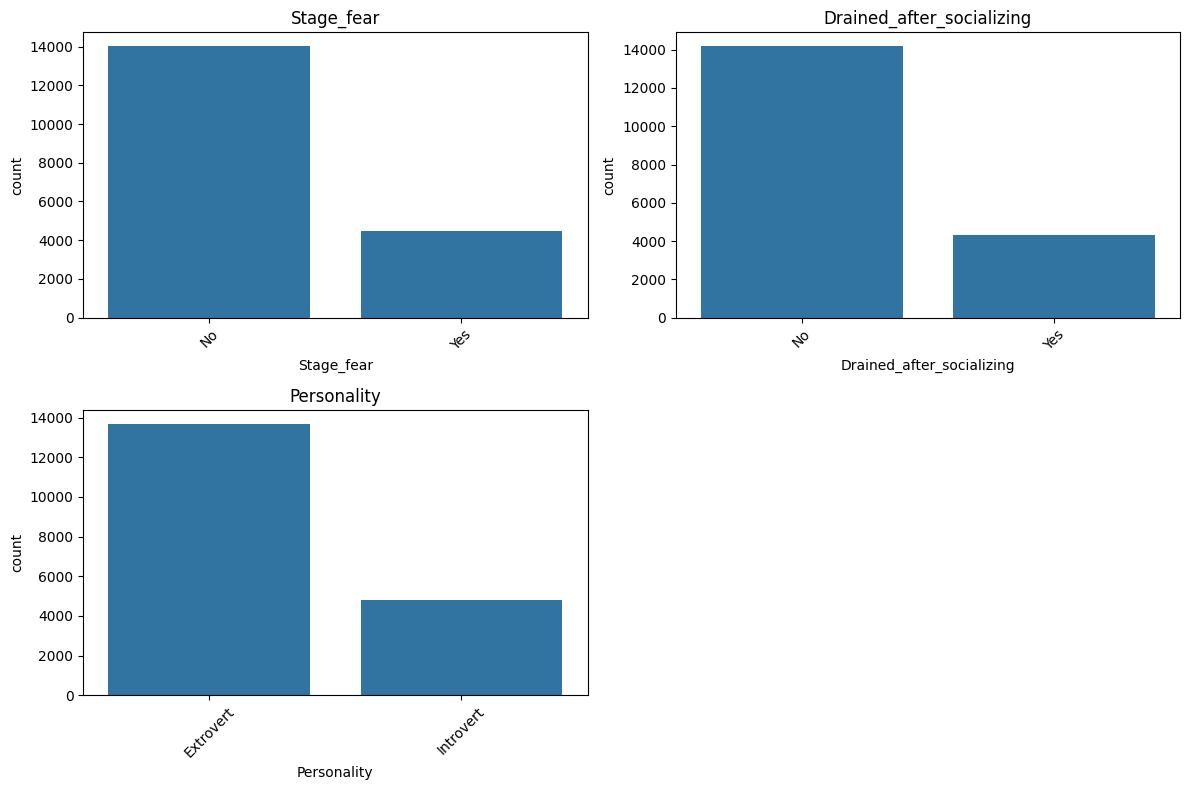

In [138]:
# Select categorical (non-numeric) features
features = df_train.select_dtypes(exclude=['number']).columns.tolist()

# Setup dynamic layout
n_features = len(features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Create subplots
for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df_train, x=feature)
    plt.title(feature)
    plt.xticks(rotation=45)  # rotate x-axis labels if needed

plt.tight_layout()
plt.show()

# **Bivariate Analysis**

In [139]:
df_train_drop_id = df_train.drop('id', axis=1)

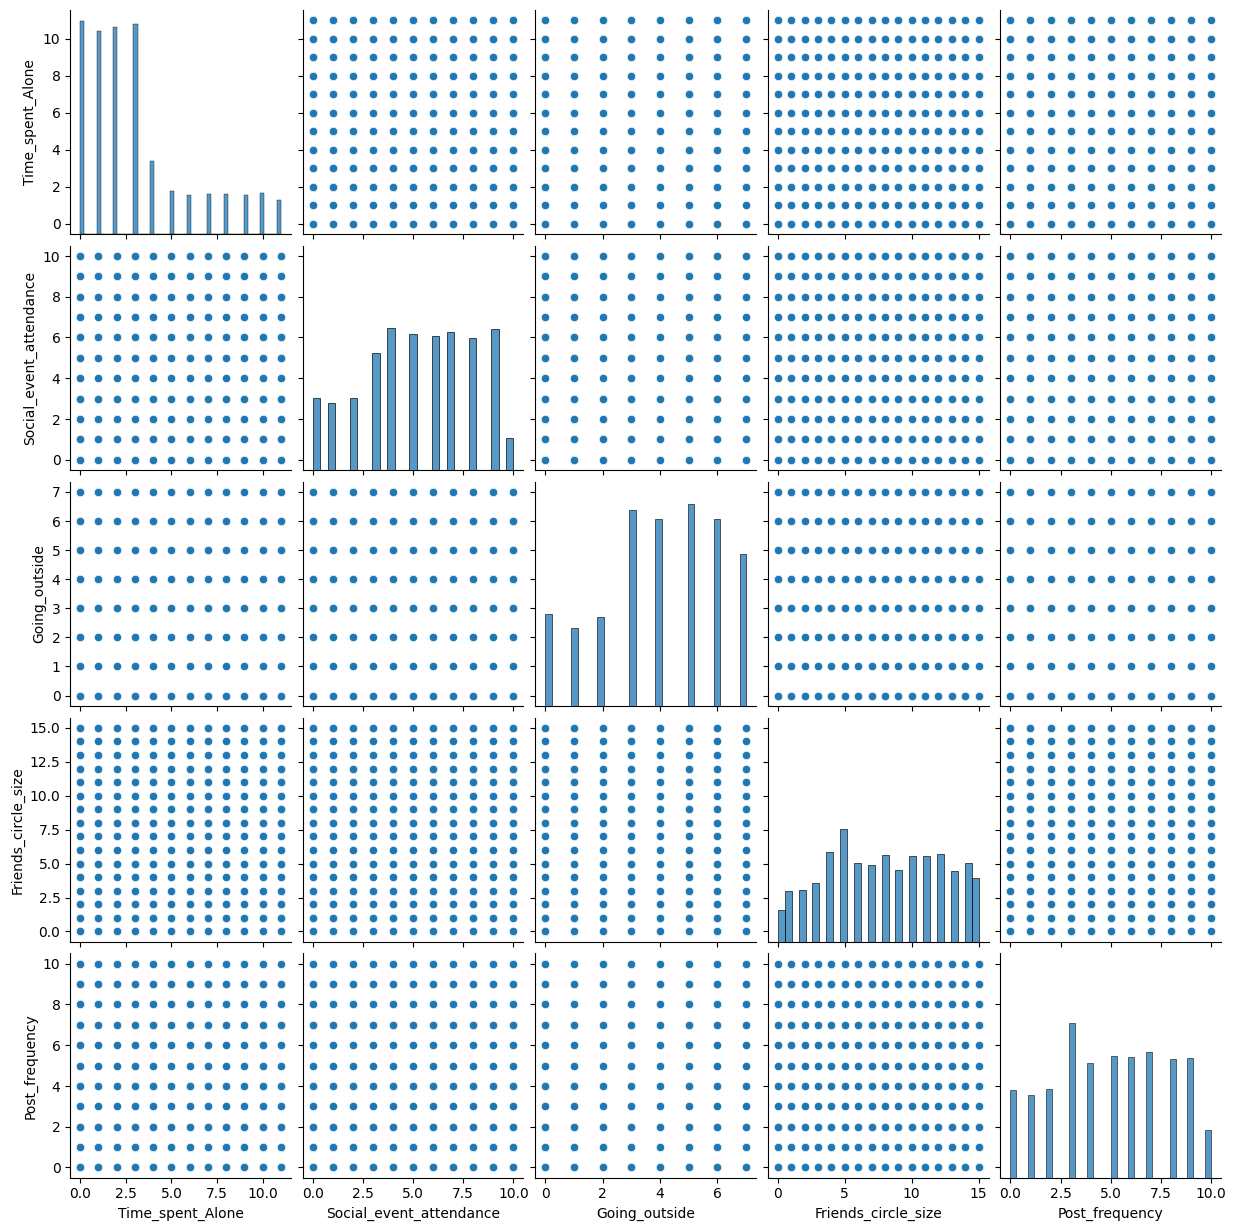

In [140]:
sns.pairplot(df_train_drop_id);

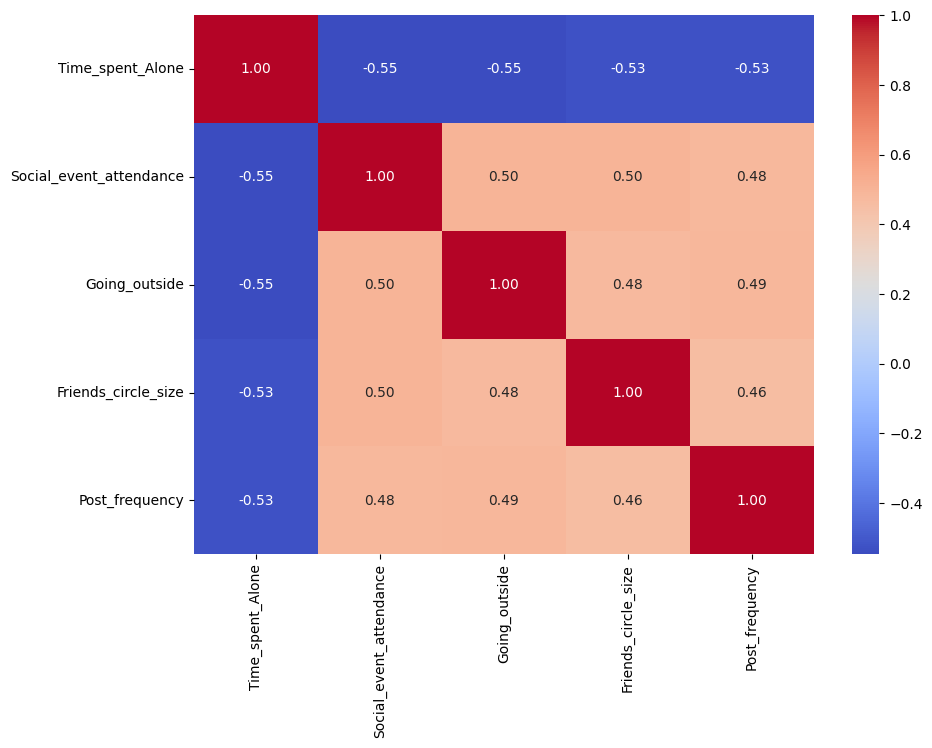

In [141]:
# defining the figure size
plt.figure(figsize=(10, 7))

# plotting the correlation heatmap
sns.heatmap(df_train_drop_id.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='coolwarm');

# **Data Preparation for Modeling**

In [142]:
target_column = 'Personality'

In [143]:
# # Map 'Y'/'N' to 1/0
# d = {'Yes': 1, 'No': 0}
# df_train['Stage_fear'] = df_train['Stage_fear'].map(d)
# df_test['Stage_fear'] = df_test['Stage_fear'].map(d)
# df_train['Drained_after_socializing'] = df_train['Drained_after_socializing'].map(d)
# df_test['Drained_after_socializing'] = df_test['Drained_after_socializing'].map(d)


# # Map education levels to numbers -  #Extrovert/Introvert to 0/1
# personality = {'Extrovert': 0, 'Introvert': 1}
# df_train['Personality'] = df_train['Personality'].map(personality)

In [144]:
le = LabelEncoder()

for col in df_train.columns:
    if df_train[col].dtype == 'object' and col != target_column :
        df_train[col] = le.fit_transform(df_train[col])
        df_test[col] = le.transform(df_test[col])

In [145]:
df_train[target_column] = le.fit_transform(df_train[target_column])  # Extrovert/Introvert to 0/1


In [146]:
x = df_train.drop(['Personality'], axis=1)
y = df_train['Personality']

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [148]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [149]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [150]:
y_pred_val = linear_regression.predict(x_test)
y_pred_val_class = (y_pred_val > 0.5).astype(int)

In [151]:
print("Linear Regression:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_val)))
print("  R²:", r2_score(y_test, y_pred_val))
print("Validation Accuracy:", accuracy_score(y_test, y_pred_val_class))

Linear Regression:
  RMSE: 0.20069093076513786
  R²: 0.7890455169476006
Validation Accuracy: 0.9676113360323887


In [152]:
test_predictions = linear_regression.predict(df_test)
test_predictions_class = (test_predictions > 0.5).astype(int)
test_predictions_labels = le.inverse_transform(test_predictions_class)


In [155]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

In [156]:
print("\nXGBoost:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("  R²:", r2_score(y_test, y_pred_xgb))


XGBoost:
  RMSE: 0.18665287260266386
  R²: 0.817525327205658


In [157]:
test_predictions = xgb_model.predict(df_test)
test_predictions_class = test_predictions.astype(int)
test_predictions_labels = le.inverse_transform(test_predictions_class)

In [158]:
weights = linear_regression.coef_
intercept = linear_regression.intercept_

print("\nLinear Regression Model Weights (Coefficients):")
for feature, weight in zip(x.columns, weights):
  print(f"  {feature}: {weight}")

print("\nLinear Regression Model Intercept:")
print(f"  {intercept}")


Linear Regression Model Weights (Coefficients):
  id: 0.0017234385892888795
  Time_spent_Alone: 0.06625288097006272
  Stage_fear: 0.1087725960404676
  Social_event_attendance: -0.03995479466367013
  Going_outside: -0.03785883703831679
  Drained_after_socializing: 0.14325806730938495
  Friends_circle_size: -0.03236527010933903
  Post_frequency: -0.036134673644936395

Linear Regression Model Intercept:
  0.26135366758890616


In [159]:
df_submission['Personality'] = test_predictions_labels

array(['Extrovert'], dtype=object)

In [160]:
submission = df_submission.copy()
submission.to_csv('submission.csv', index=False)

In [161]:
files.download('submission.csv')